# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [12]:
#Importing data from tidytuesday
Vaccine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv', , col_types = cols())

#Verifying import
Vaccine %>% head(5)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [13]:
# create the df_vacc_rates here
# To filter I set the value of mmr to be greater than or equal to 0 as -1 appears to be used for missing values

df_vacc_rates = Vaccine %>% 
                    filter(mmr >= 0) %>%
                        group_by(state) %>%
                            summarize(num_95plus = sum(mmr >= 95, na.rm=TRUE), 
                                      Total_Records = n(), 
                                      vacc_rates  = sum(mmr >= 95, na.rm=TRUE)/n())



Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [14]:
df_vacc_rates %>% 
    arrange(vacc_rates) %>% # This arrangment works well because default sort is ascending order.
        head(1) # Printing the first row as this is the smallest value.

state,num_95plus,Total_Records,vacc_rates
<chr>,<int>,<int>,<dbl>
Arkansas,2,567,0.003527337


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [18]:
ecdf = Vaccine %>%
        # Removing Missing values and keeping data from North Carolina
        filter(overall >= 0 & state == 'North Carolina') %>%
            # Arranging by overall rate to prepare for the ecdf plot 
             arrange(overall) %>%
                # Creating a variable called fraction of schools     
                mutate(rn = row_number(), fraction_of_schools =  rn/max(rn)) %>%
                    # Reducing the dataset to key variables as well as variables used to make them.
                    select(state, name, overall, fraction_of_schools, rn) 

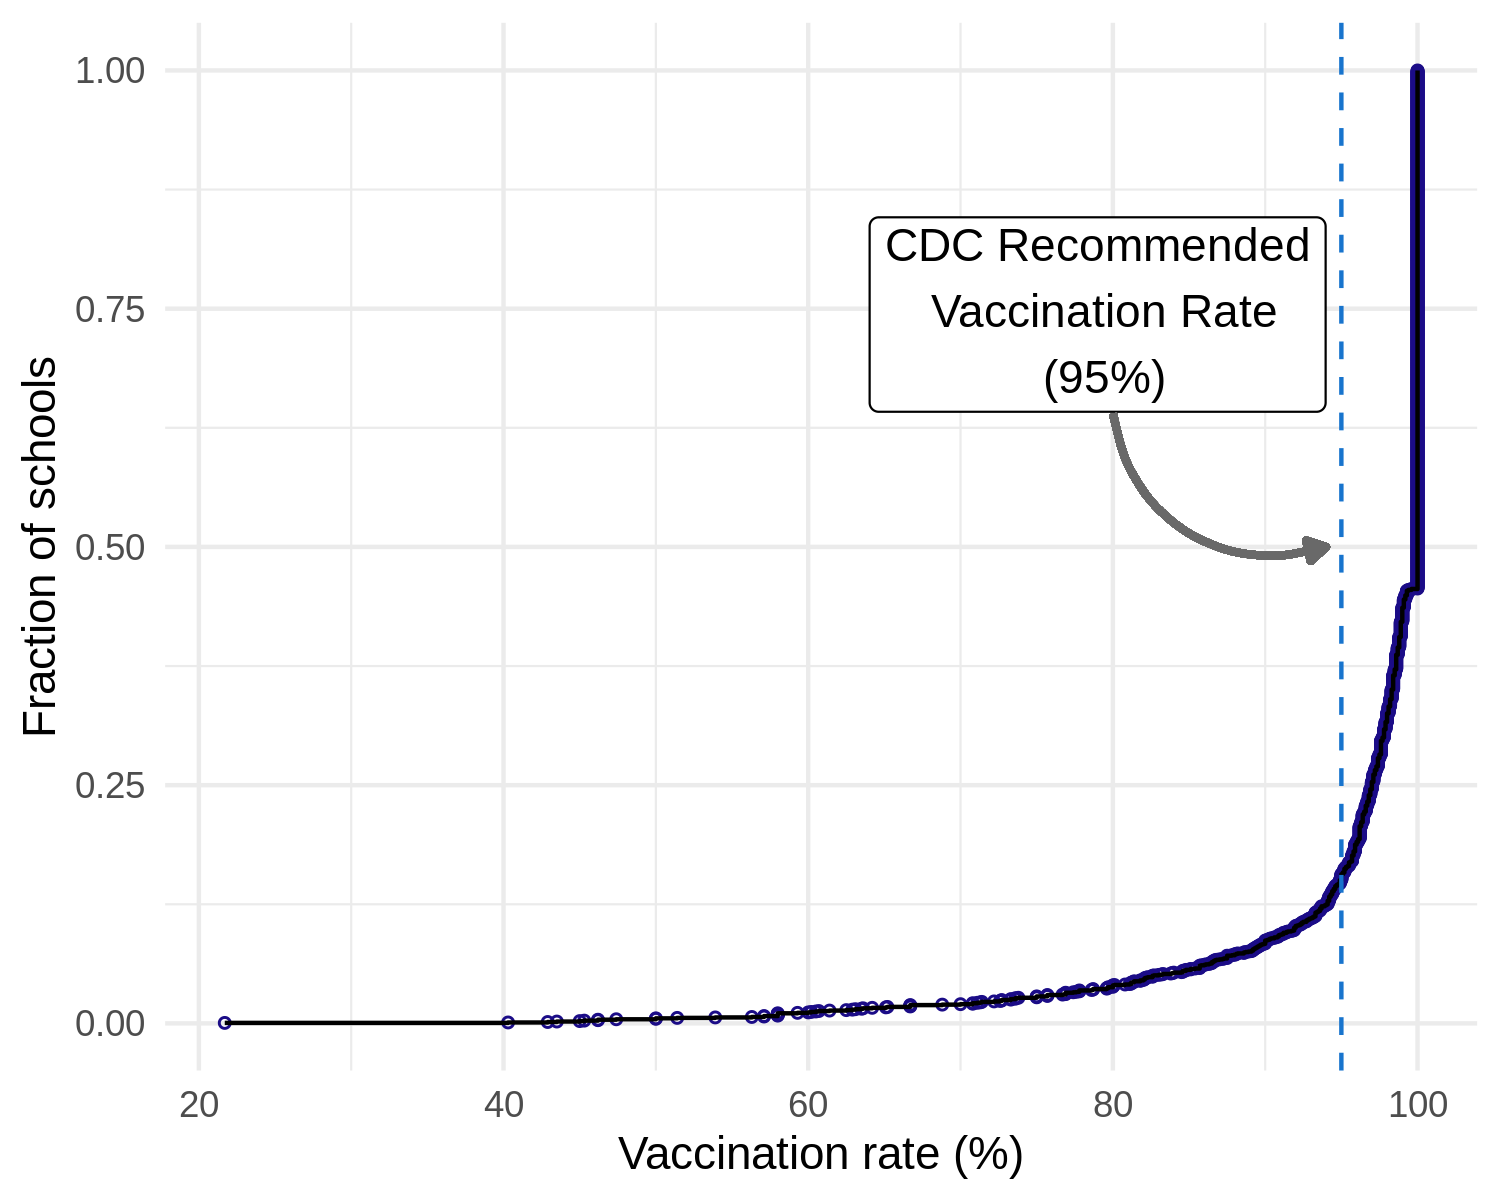

In [25]:
p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools))

p = p + geom_point(color = '#1b0c87', shape = 1, size = 0.9) + geom_step()

p = p + geom_vline(xintercept = 95, linetype = 'dashed', color = 'dodgerblue3')

p = p + xlab(label = 'Vaccination rate (%)') + ylab(label = 'Fraction of schools')

# In order to get the arrow and text, I used annotate & geom_curve. I could have attained similar
# results using geom_text_repel from ggrepel

p = p + annotate(x = 79, y=+Inf, label="CDC Recommended\n Vaccination Rate\n (95%)",vjust=2,geom="label")

p = p  + geom_curve(
          aes(x = 80, y = 0.64, xend = 94, yend = 0.50),
          arrow = arrow(
            length = unit(0.02, "npc"), 
                        type="closed"
            ),
          colour = "#696969",
          size = 0.9,
          angle = 90
)

p = p + theme_minimal()
 
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

### Yes, the median vaccination rate for NC schools is 100%, which is higher than the CDC recommended target.

### This is graphically supported as the median value (the point where fraction of schools = 0.50) has an x-axis value (the vaccination rate) of 100.

### Additionally, running the following code verifies that the median is 100 (if you weren't looking at the ecdf plot)
`ecdf %>% summarize(median_rate = median(overall))`